In [229]:
import numpy as np
import load_points
import matplotlib.pyplot as plt

In [236]:
# World to Camera transformation of Frame
# 1. Translate by [27,6,-8]
# 2. Rotate by -90˚ along the Z axis
# 3. Rotate by -90˚ along the X axis

# Thus,
#     Pworld = [ 1 0 0 27 ] [ 0 1 0 0 ] [1  0 0 0] Pcamera
#              [ 0 1 0  6 ] [-1 0 0 0 ] [0  0 1 0]
#              [ 0 0 1 -8 ] [ 0 0 1 0 ] [0 -1 0 0]
#              [ 0 0 0  1 ] [ 0 0 0 1 ] [0  0 0 1]

In [237]:
T1 = np.array([[1,0,0,-0.27],[0,1,0,-0.06],[0,0,1,0.08],[0,0,0,1]])
R1 = np.array([[0,-1,0,0],[1,0,0,0],[0,0,1,0],[0,0,0,1]])
R2 = np.array([[0,0,-1,0],[0,1,0,0],[1,0,0,0],[0,0,0,1]])
K = np.array([[7.215377e+02, 0.000000e+00, 6.095593e+02],[0.000000e+00, 7.215377e+02, 1.728540e+02],[0.000000e+00, 0.000000e+00, 1.000000e+00]])

In [238]:
# M = np.matmul(np.matmul(T1,R1),R2)
tK = np.append(K, np.zeros((K.shape[0],1)), axis=1)
P = np.matmul(K,M)


In [239]:
points = load_points.load_velodyne_points('lidar-points.bin')
points = np.append(points, np.ones((points.shape[0],1)), axis=1)

In [240]:
image_points = np.matmul(P, points.T)
image_points = image_points.T

[[ 8.36030164e+02 -5.33935391e+03  1.00000000e+00]
 [ 8.14024251e+02 -4.78978066e+03  1.00000000e+00]
 [ 7.85876886e+02 -3.81908609e+03  1.00000000e+00]
 ...
 [ 3.52539558e+02  2.64222708e+02  1.00000000e+00]
 [ 3.52209403e+02  2.74748882e+02  1.00000000e+00]
 [ 3.52012846e+02  2.85248493e+02  1.00000000e+00]]


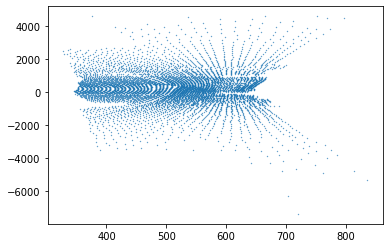

In [241]:
image_points[:,0] /= image_points[:,2]
image_points[:,1] /= image_points[:,2]
image_points[:,2] /= image_points[:,2]
print(image_points)
plt.scatter(image_points[:,0], image_points[:,1], s=0.1)